# Scipy Stats Jupyter Notebook

[Official Documentation](https://docs.scipy.org/doc/scipy/reference/stats.html)

***

## Python Libaries

In [97]:
import random
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import statsmodels.api as sm

## Plot styles

In [98]:
#default plot style
plt.style.use('fivethirtyeight')

#default plot size
plt.rcParams['figure.figsize'] = [12, 6]

***

## Student t-test

The T-Test is used to determine if the mean (average) of two groups are truly different.

https://statistics.laerd.com/spss-tutorials/independent-t-test-using-spss-statistics.php

https://en.wikipedia.org/wiki/Student%27s_t-test

#### Types of T-Test
There are three types of T-Tests that you can run.

* Independent Sample T-Test. 
In this type of test, you are comparing the average of two independent unrelated groups. Meaning, you are comparing samples from two different populations and are testing whether or not they have a different average.

* Paired Sample T-Test. 
In this test, you compare the average of two samples taken from the same population but at different points in time. A simple example would be when you would like to test the means of before and after observations taken from the same target.

* One-Sample T-Test
Test if the average of a single group is different from a known average or hypothesized average.

#### One-sample test formula


${\displaystyle t={\frac {{\bar {x}}-\mu _{0}}{s/{\sqrt {n}}}}}$

#### Independent two-sample t-test

${\displaystyle t={\frac {{\bar {X}}_{1}-{\bar {X}}_{2}}{s_{p}{\sqrt {\frac {2}{n}}}}}}$


### Assumptions for t-test

* Dependent variable should be measured on a continuous scale.

* Independent variables should consist of two categorical, independent groups.

* Independence of observations.

* There should be no significant outliers.

* Dependent variable should be approximately normally distributed for each group of the independent variables.

* There needs to be homogeneity of variances.

***




In [99]:
import random
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#### Python Independent Sample T-Test
* 2 samples of 50 observations generated
* Sample A is taken from a population of mean 55 and a standard deviation of 20. 
* Sample B is taken from a population of mean 50 and a standard deviation of 15.

In [100]:
random.seed(20) #for results to be recreated
N = 50 #number of samples to take from each population
a = [random.gauss(2,.3) for x in range(N)] #take N samples from population A
b = [random.gauss(2,.3) for x in range(N)] #take N samples from population B

Text(0.5, 1.0, 'Independent Sample T-Test')

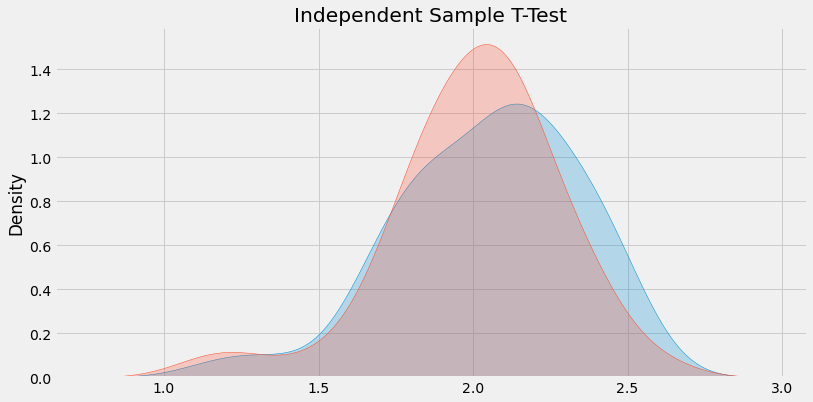

In [101]:
sns.kdeplot(a, shade=True)
sns.kdeplot(b, shade=True)
plt.title("Independent Sample T-Test")

## * Null Hypothesis: µa = µb (the means of both populations are equal)
* Alternate Hypothesis: µa ≠ µb (the means of both populations are not equal)

In [102]:
tStat, pValue = ss.ttest_ind(a, b, equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic
###P-Value:0.017485741540118758 T-Statistic:2.421942924642376t

P-Value:0.41819460730578417 T-Statistic:0.8130021446014069


* There is enough evidence to reject the Null Hypothesis as the P-Value is low (typically ≤ 0.05).

In [103]:
c = [random.gauss(54,20) for x in range(N)] #take N samples from population C
d = [random.gauss(55,20) for x in range(N)] #take N samples from population D

Text(0.5, 1.0, 'Independent Sample T-Test')

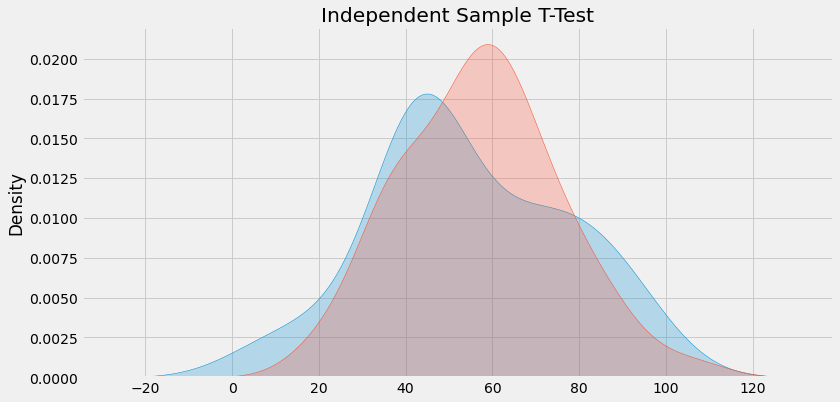

In [104]:
sns.kdeplot(c, shade=True)
sns.kdeplot(d, shade=True)
plt.title("Independent Sample T-Test")

In [105]:
tStat, pValue = ss.ttest_ind(c, d, equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic


P-Value:0.5745272129534358 T-Statistic:-0.5633746497208574


* There is enough evidence to accept the Null Hypothesis as the P-Value is high (typically >= 0.05).

In [106]:
# Let's run 10000 t-tests where the means are equal.
# We should make the wrong decision (reject the hypothesis) (100 * critical) percent of the time.

trials = 10000
N = 100
m_a, m_b, s_a,s_b = 55.0, 50.0, 20.0 ,15.0
rejects = 0
critical = 0.05

for i in range(trials):
    a = np.random.normal(loc=m_a, scale=s_a, size=N)
    b = np.random.normal(loc=m_b, scale=s_b, size=N)
    if ss.ttest_ind(a, b)[1] <= critical:
        rejects = rejects + 1

typei = 100.0 * (rejects / trials)
print(f"{typei:0.2f}%")

52.01%


In [107]:
trials = 10000
N = 100
#m_a, m_b, s = 2.0, 2.0, 0.3
dont = 0

for i in range(trials):
    a = np.random.normal(loc=m_a, scale=s_a, size=N)
    b = np.random.normal(loc=m_b, scale=s_b, size=N)
    if ss.ttest_ind(a, b)[1] > 0.05:
        dont = dont + 1

typeii = 100.0 * (dont / trials)
print(f"{typeii:0.2f}%")

48.26%


### One test sample

* Null Hypothesis: $µa = X$ (the population mean is equal to a mean of X)
* Alternate Hypothesis: $µa ≠ X$ (he population mean is not equal to a mean of X )

In [108]:
import random
import scipy.stats as ss

random.seed(20) #for results to be recreated

N = 30 #number of samples to take from each population

a = [random.gauss(50,15) for x in range(N)] #take N samples from population A

popmean = 50.5  #hypothesized population mean

In [109]:
tStat, pValue =  ss.stats.ttest_1samp(a, popmean, axis=0)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic
###P-Value:0.5340949682112062 T-Statistic:0.6292755379958038

P-Value:0.5340949682112062 T-Statistic:0.6292755379958038


Since the P-Value is not low, 0.5 in this case, we fail to reject the Null Hypothesis. Statistically speaking, there is not enough evidence to conclude that the population average (mean) is not equal to 50.5.

Hypothesis Testing basics

https://www.youtube.com/watch?v=CIbJSX-biu0

* check to accept null or alternative hypotheses


#### Null hypotheses

* assumes nothing intresting going on between whateber variables tested

#### Alternative hypotheses
* there is something intresting going on
* samples drawn from two distinct distributions


#### Stat test needs two things

* population distribution
* sample data comparing to the population

#### Chose significance level alpha $a$
* deteremines when you reject null hypothesis
* if probabilty of getting a result as extreme as the one you observe due to chance is lower than significance level, you reject null hypothesis
* probabiltity of seeing a result as extreme or more extreme than the one observed is known as the p-value

#### T-test
* Statistical test used to determine whether a numeric data sample differs significantly from the population or whether two samples differ from one another


### One-sample Test

* A one-sample t-test cjhecks whether a sample mean differs from the population mean.
* Dummy age data created for population of voters in entire country and a sample of voters in Kerry.
* Test whetehr the average age of voters in Kerry differs from the population

In [110]:
np.random.seed(6)

In [111]:
population_ages1 = ss.poisson.rvs(loc=18, mu=35, size=150000)
population_ages2 = ss.poisson.rvs(loc=18, mu=10, size=100000)
population_ages = np.concatenate((population_ages1,population_ages2))

In [112]:
kerry_ages1 = ss.poisson.rvs(loc=18, mu=30, size=30)
kerry_ages2 = ss.poisson.rvs(loc=18, mu=10, size=20)
kerry_ages = np.concatenate((kerry_ages1,kerry_ages2))

In [113]:
print(population_ages.mean())

43.000112


In [114]:
print(kerry_ages.mean())

39.26


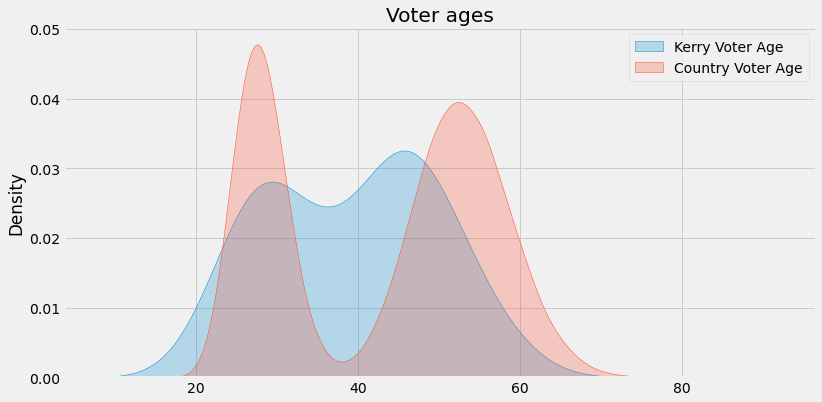

In [115]:
sns.kdeplot(kerry_ages, shade=True,label='Kerry Voter Age')
sns.kdeplot(population_ages, shade=True,label='Country Voter Age')
plt.legend()
plt.title("Voter ages");

#### Conduct t-test at a 95% confidence level

* we know different metrics used to create the distributions
* does it correctly reject the null hypothesis that 'the sample comes from the same distribution as the popultion'

In [57]:
ss.ttest_1samp(a=kerry_ages,popmean=population_ages.mean())
t_val = ss.ttest_1samp(a=kerry_ages,popmean=population_ages.mean())[0]
t_val

p_val = ss.ttest_1samp(a=kerry_ages,popmean=population_ages.mean())[1]
p_val

ss.ttest_1samp(a=kerry_ages,popmean=population_ages.mean())

Ttest_1sampResult(statistic=-2.5742714883655027, pvalue=0.013118685425061678)

* test shows "t" = -1.136
* tells us how much sample mean deviates from null hypothesis
* if t-stat lies outside qunatiles of t-distribution corresponding to our confidence level and degrees of freedom, we rejct null h

#### check quantiles

In [58]:
#lower quantile
ss.t.ppf(q=0.025
         #degrees of freedom N-1
         ,df=49) 

-2.0095752344892093

In [59]:
#upper quantile 
ss.t.ppf(q=0.975,df=49)

2.009575234489209

* if t-stat outside this range we accept altenative hypothesis
* will mean p-value is small

In [60]:
#pval calc
ss.t.cdf(x=t_val,df=49)*2

0.013118685425061678

* alternative hypothesis checks whether sample mean differs (not eqiual to) the population mean.
* p-value of 0.013
* expect to see data as extreme as our sample due to chance about 1.3% of the time if null hypothesis is true
* here p_value loweer than our significance level so we should reject the null hypothesis

In [61]:
sigma = kerry_ages.std()/math.sqrt(len(kerry_ages)) # smaple data/sample size

ss.t.interval(0.95, #confidence level
              df=len(kerry_ages)-1, # degrees of freedom
              loc=kerry_ages.mean(), #sample mean
              scale=sigma) # standard dev estimate

(36.369669080722176, 42.15033091927782)

* 99% confidence level
* accept null


In [62]:
ss.t.interval(0.99, #confidence level
              df=len(kerry_ages)-1, # degrees of freedom
              loc=kerry_ages.mean(), #sample mean
              scale=sigma) # standard dev estimate

(35.40547994092107, 43.11452005907893)

### Two-sample Test
* two data samples to another
* null hypothesis is both groups the dsame
* alternative is they from different distributions


In [63]:
np.random.seed(12)
cork_ages1 = ss.poisson.rvs(loc=18, mu=33, size=30)
cork_ages2 = ss.poisson.rvs(loc=18, mu=13, size=20)
cork_ages = np.concatenate((cork_ages1,cork_ages2))

In [64]:
cork_ages.mean()

42.8

In [65]:
kerry_ages.mean()

39.26

In [66]:
ss.ttest_ind(a = kerry_ages, b = cork_ages,equal_var=False)

Ttest_indResult(statistic=-1.7083870793286842, pvalue=0.09073104343957748)

* expect extreme result 9.0% of the time
* with 95% confidence we can't reject null hypothesis

### Paired T-test
* basic t-test designed for testing differecnes between independant groups
* sometimes need to test differences between samples in same group at differnt points in time
* eg hospital might want to test whether a weight loss drug works by checking weights of patients before and after treatment
* paired t-test used for this

In [67]:
np.random.seed(11)

before = ss.norm.rvs(scale = 30, loc= 250, size = 100)

after = before + ss.norm.rvs(scale=5,loc=-1.25,size=100)

weight_df = pd.DataFrame({"weight_before":before,
                         "weight_after":after,
                         "weight_change": after-before})

weight_df.describe()

,weight_before,weight_after,weight_change
count,100.000000,100.000000,100.000000
mean,250.345546,249.115171,-1.230375
std,28.132539,28.422183,4.783696
min,170.400443,165.913930,-11.495286
25%,230.421042,229.148236,-4.046211
50%,250.830805,251.134089,-1.413463
75%,270.637145,268.927258,1.738673
max,314.700233,316.720357,9.759282


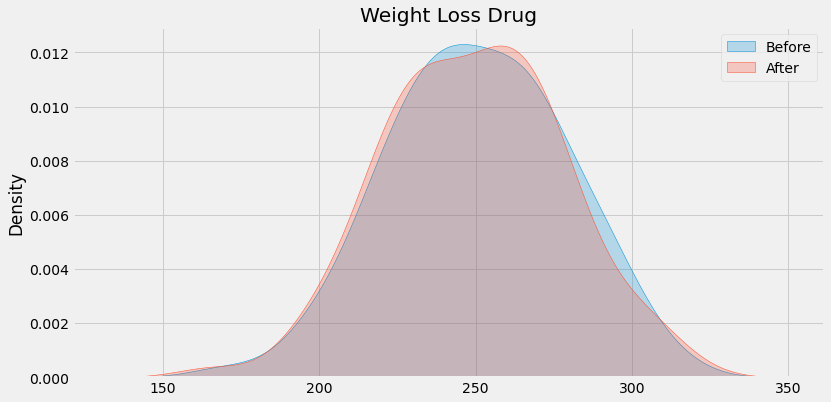

In [68]:
sns.kdeplot(before, shade=True,label='Before')
sns.kdeplot(after, shade=True,label='After')
plt.legend()
plt.title("Weight Loss Drug");

In [78]:
ss.ttest_rel(a=before,b=after)

Ttest_relResult(statistic=2.5720175998568284, pvalue=0.011596444318439857)

* summary shows patients lost about 1.23 pounds on average after treatment

### Type I and Type II errors

* Type I false positive - rejecting null when its true
* type II false negative - fail to reject null hypothesis

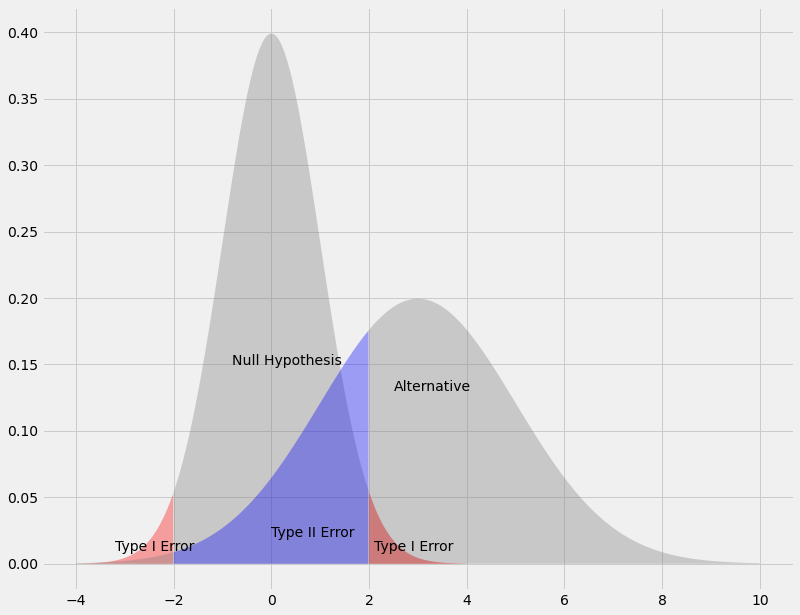

In [86]:
plt.figure(figsize=(12,10))

plt.fill_between(x=np.arange(-4,-2,0.01),y1=ss.norm.pdf(np.arange(-4,-2,0.01)),facecolor='red',alpha=0.35)

plt.fill_between(x=np.arange(-2,2,0.01),y1=ss.norm.pdf(np.arange(-2,2,0.01)),facecolor='grey',alpha=0.35)

plt.fill_between(x=np.arange(2,4,0.01),y1=ss.norm.pdf(np.arange(2,4,0.01)),facecolor='red',alpha=0.5)

plt.fill_between(x=np.arange(-4,-2,0.01),y1=ss.norm.pdf(np.arange(-4,-2,0.01),loc=3,scale=2),facecolor='grey',alpha=0.35)

plt.fill_between(x=np.arange(-2,2,0.01),y1=ss.norm.pdf(np.arange(-2,2,0.01),loc=3,scale=2),facecolor='blue',alpha=0.35)

plt.fill_between(x=np.arange(2,10,0.01),y1=ss.norm.pdf(np.arange(2,10,0.01),loc=3,scale=2),facecolor='grey',alpha=0.35)

plt.text(x=-0.8,y=0.15, s='Null Hypothesis')
plt.text(x=2.5,y=0.13, s='Alternative')
plt.text(x=2.1,y=0.01, s='Type I Error')
plt.text(x=-3.2,y=0.01, s='Type I Error')
plt.text(x=0,y=0.02, s='Type II Error');

In [94]:
trials = 10000
N = 100
m_a, m_b, s = 2.0, 2.0, 0.3
rejects = 0
critical = 0.05

for i in range(trials):
    a = np.random.normal(loc=m_a, scale=s, size=N)
    b = np.random.normal(loc=m_b, scale=s, size=N)
    if ss.ttest_ind(a ,b)[1] <= critical:
        rejects = rejects + 1

typei = 100.0 * (rejects / trials)
print(f"{typei:0.2f}%")

4.53%


In [96]:
trials = 10000
N = 100
m_a, m_b, s = 2.0, 2.1, 0.3
dont = 0

for i in range(trials):
    a = np.random.normal(loc=m_a, scale=s, size=N)
    b = np.random.normal(loc=m_b, scale=s, size=N)
    if ss.ttest_ind(a, b)[1] > 0.05:
        dont = dont + 1

typeii = 100.0 * (dont / trials)
print(f"{typeii:0.2f}%")

34.84%


## References

***

# End